# Company Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Company=pd.read_csv('/content/Company_Data.csv')
print(Company.shape)
Company.head(10)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
Company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
Company['ShelveLoc'] = number.fit_transform(Company.ShelveLoc)
Company['Urban'] = number.fit_transform(Company.Urban)
Company['US'] = number.fit_transform(Company.US)

In [6]:
feature_cols = ('CompPrice','Income','Advertising','Population','Price','Age','Education')

In [7]:
Company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,2,71,15,1,0
7,11.85,136,81,15,425,120,1,67,10,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1


In [8]:
X = Company.drop('Sales', axis=1)
y = Company['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [10]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
print(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train))
y_test = lab_enc.fit_transform(y_test)
print(y_test)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_test))

[165 223  99 128  25 110  58  97   2 193  98  78 100 197 167 123  54 121
 231  79 135 131 122 112 179 137 103  74 199  65  38 139 142 180   3  41
 118 114 229  78  48 169 105  42 167  18  10 201  87  31 174  22 168 159
  57 120 155  62 125  61  63   6  64 176 129  37  96 217 215 190 119 100
 131  85 177 164 203 132 226 105  59 144  73  57 106  88   9  38 189 160
 152 178 184 147 104 228  25 161  83 156  76  92  84 170 133  36 150 153
  53 143 124 162 186 181  29 230  47 151  40 158 172  24 207  13 140 117
 191 227  89  72  36 195 206 216 202 138 182  50 183 192  28  32  30  26
 132 115 145 224 224   8 113  35  84  77  70  17  60 102  56 126 111  19
 127 194   5  90  49  94 132 154 208 119   7  80 196  75  16 166 172 142
 220  33 198  21  67  93 187  52  79  12  27  34 163 209  55  69 107 210
 200 140  74  11 130  44 213 136  44 109 219 205  86  95 188 101  15  71
  20  43 175 110 134  47   4   0 221 116  82 212  66  23 149  68 146 222
 173  39 108 100 211  81 157 171 212 148 204  14  4

In [11]:
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import tree
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)
y_pred= dt2.predict(X_test)
dt2_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt2_accuracy_score)

Training score:  0.03461538461538462
Testing score:  0.007142857142857143
Accuracy Score:  0.007142857142857143


In [12]:
text_representation = tree.export_text(dt2)
print(text_representation)

|--- feature_3 <= 326.50
|   |--- feature_6 <= 78.00
|   |   |--- class: 100
|   |--- feature_6 >  78.00
|   |   |--- class: 44
|--- feature_3 >  326.50
|   |--- feature_4 <= 130.50
|   |   |--- class: 110
|   |--- feature_4 >  130.50
|   |   |--- class: 25



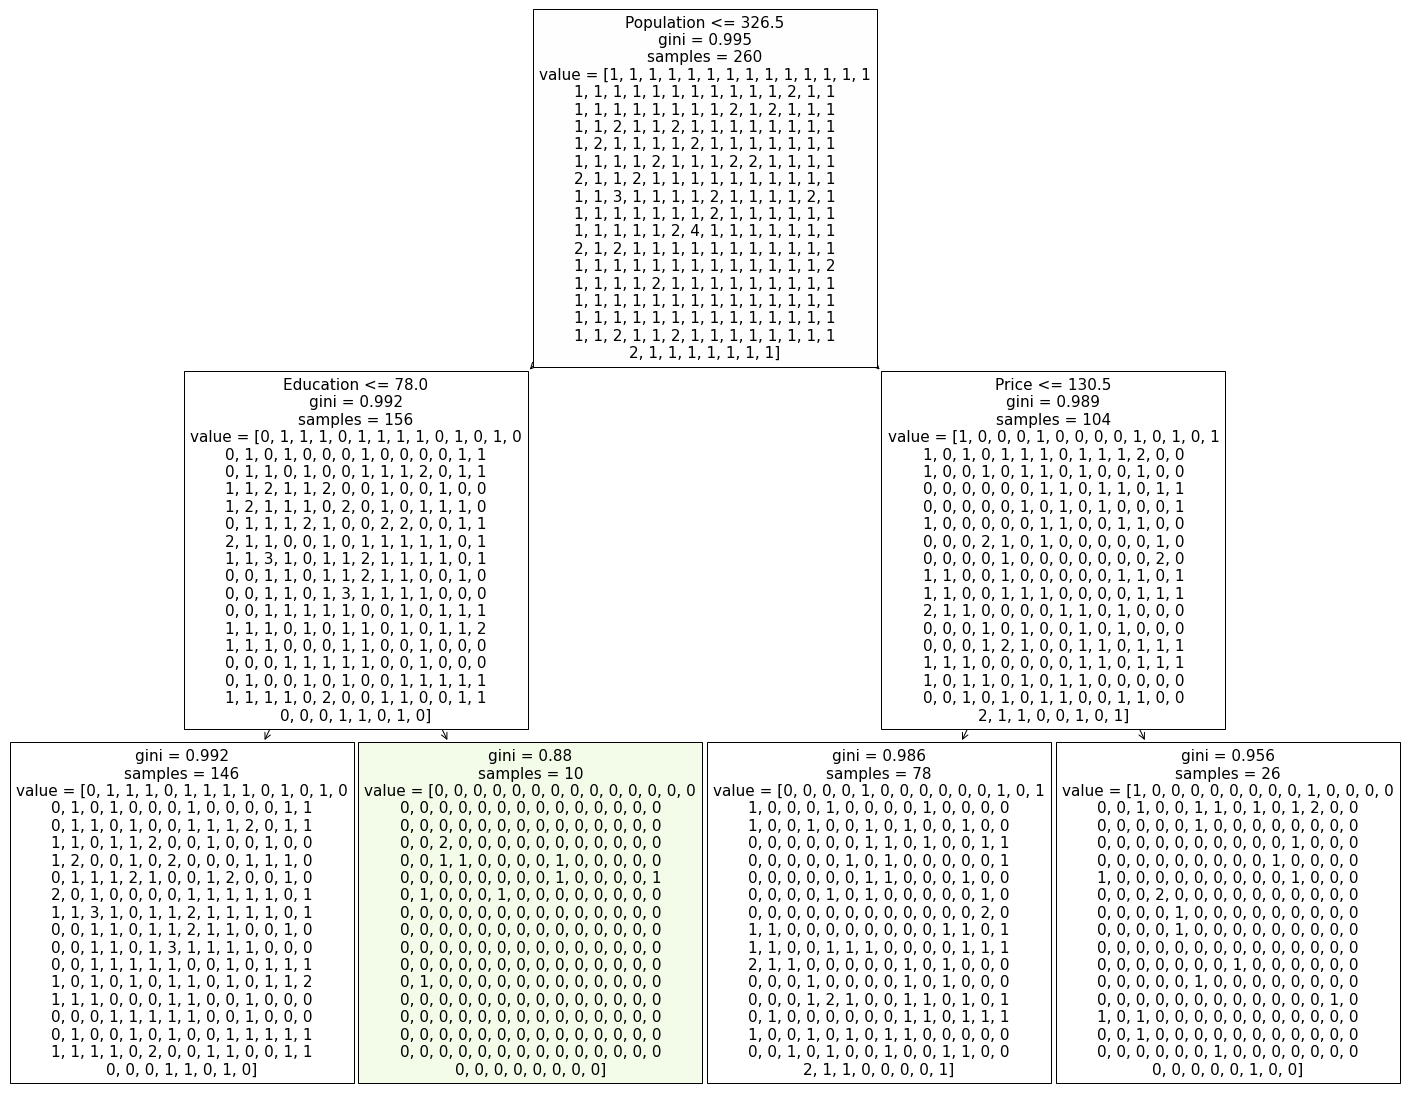

In [13]:
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dt2, feature_names=feature_cols,filled=True)

In [14]:
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)
y_pred= dt3.predict(X_test)
dt3_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt3_accuracy_score)

Training score:  0.057692307692307696
Testing score:  0.007142857142857143
Accuracy Score:  0.007142857142857143


|--- feature_3 <= 326.50
|   |--- feature_6 <= 78.00
|   |   |--- feature_6 <= 39.50
|   |   |   |--- class: 38
|   |   |--- feature_6 >  39.50
|   |   |   |--- class: 100
|   |--- feature_6 >  78.00
|   |   |--- feature_3 <= 207.50
|   |   |   |--- class: 58
|   |   |--- feature_3 >  207.50
|   |   |   |--- class: 44
|--- feature_3 >  326.50
|   |--- feature_4 <= 130.50
|   |   |--- feature_3 <= 374.50
|   |   |   |--- class: 140
|   |   |--- feature_3 >  374.50
|   |   |   |--- class: 110
|   |--- feature_4 >  130.50
|   |   |--- feature_2 <= 7.00
|   |   |   |--- class: 25
|   |   |--- feature_2 >  7.00
|   |   |   |--- class: 16



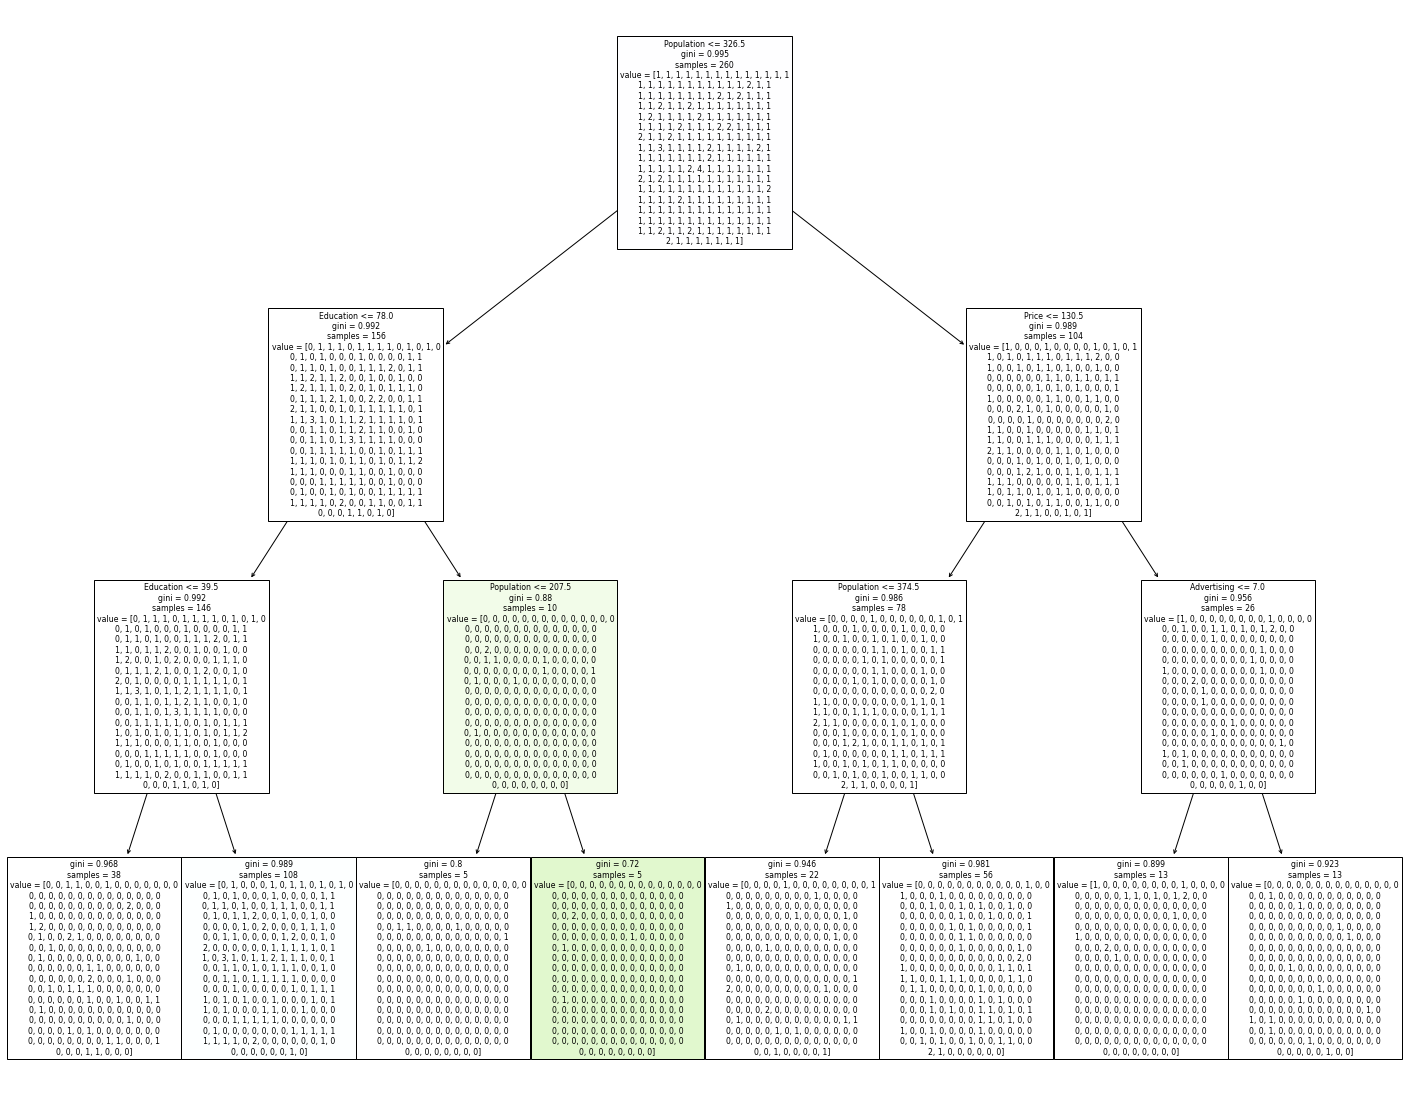

In [15]:
text_representation = tree.export_text(dt3)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dt3, feature_names=feature_cols,filled=True)

In [16]:
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(X_train, y_train)
dt4_score_train = dt4.score(X_train, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(X_test, y_test)
print("Testing score: ",dt4_score_test)
y_pred= dt4.predict(X_test)
dt4_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt4_accuracy_score)

Training score:  0.10384615384615385
Testing score:  0.007142857142857143
Accuracy Score:  0.007142857142857143


In [17]:
text_representation = tree.export_text(dt4)
print(text_representation)

|--- feature_3 <= 326.50
|   |--- feature_6 <= 78.00
|   |   |--- feature_6 <= 39.50
|   |   |   |--- feature_7 <= 17.50
|   |   |   |   |--- class: 38
|   |   |   |--- feature_7 >  17.50
|   |   |   |   |--- class: 57
|   |   |--- feature_6 >  39.50
|   |   |   |--- feature_1 <= 31.50
|   |   |   |   |--- class: 62
|   |   |   |--- feature_1 >  31.50
|   |   |   |   |--- class: 100
|   |--- feature_6 >  78.00
|   |   |--- feature_0 <= 122.50
|   |   |   |--- feature_1 <= 42.00
|   |   |   |   |--- class: 78
|   |   |   |--- feature_1 >  42.00
|   |   |   |   |--- class: 44
|   |   |--- feature_0 >  122.50
|   |   |   |--- feature_5 <= 1.00
|   |   |   |   |--- class: 59
|   |   |   |--- feature_5 >  1.00
|   |   |   |   |--- class: 64
|--- feature_3 >  326.50
|   |--- feature_4 <= 130.50
|   |   |--- feature_3 <= 374.50
|   |   |   |--- feature_3 <= 360.00
|   |   |   |   |--- class: 140
|   |   |   |--- feature_3 >  360.00
|   |   |   |   |--- class: 172
|   |   |--- feature_3 >  374

In [18]:
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)
y_pred= dt.predict(X_test)
dt_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt_accuracy_score)

Training score:  0.019230769230769232
Testing score:  0.007142857142857143
Accuracy Score:  0.007142857142857143


|--- feature_3 <= 326.50
|   |--- class: 100
|--- feature_3 >  326.50
|   |--- class: 25



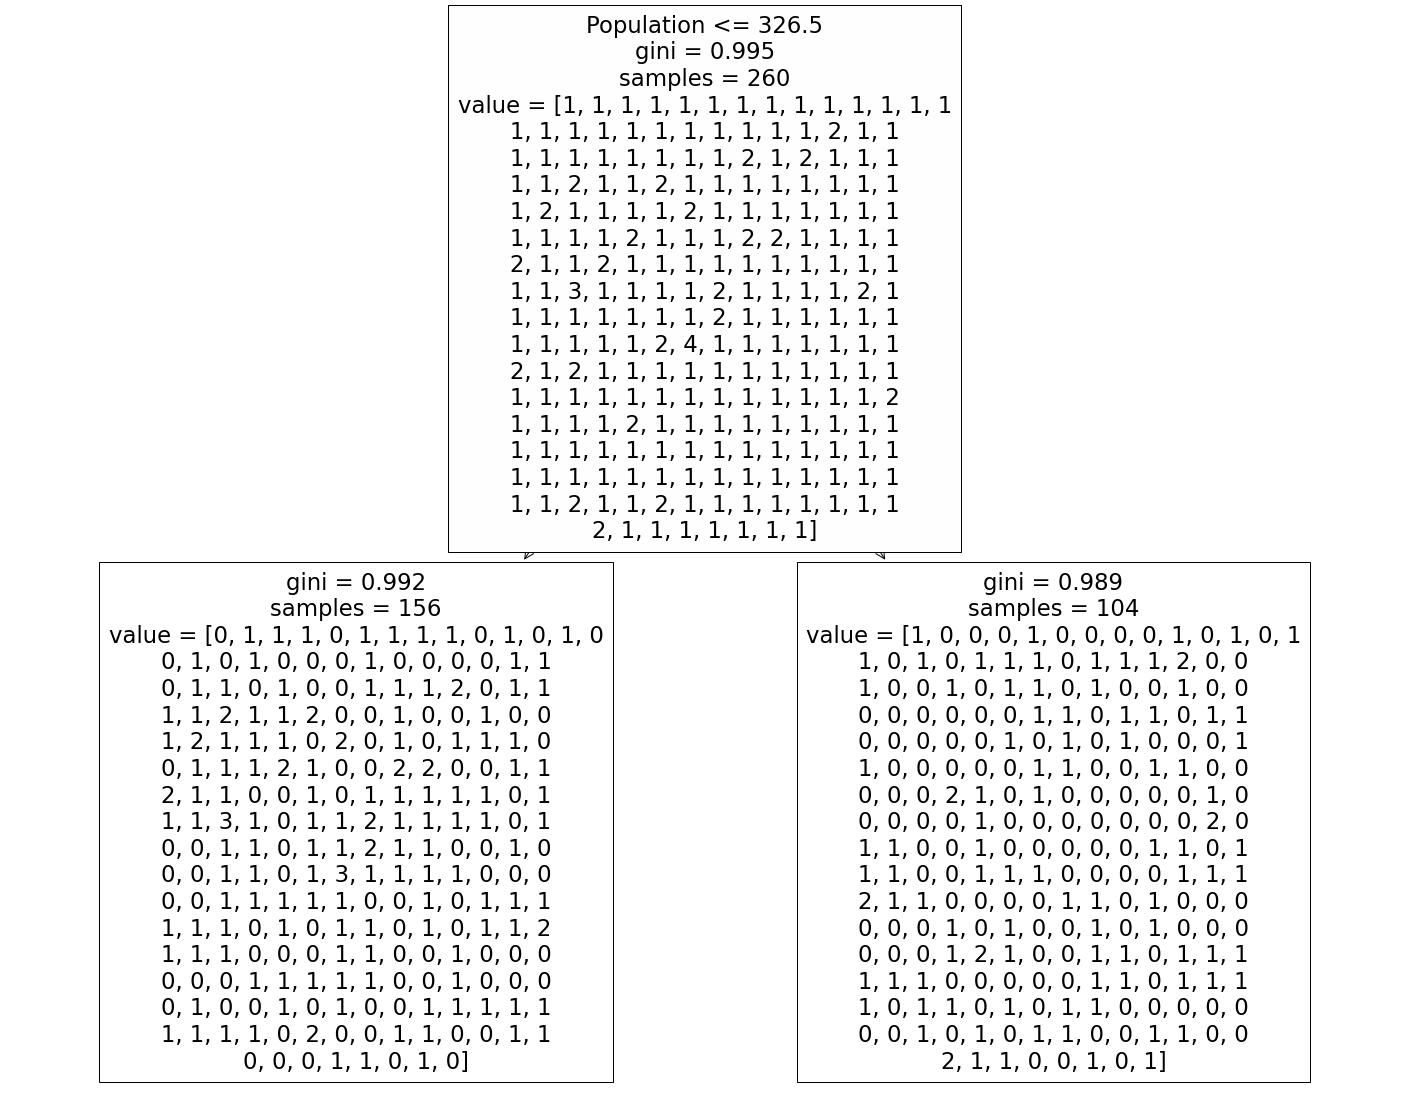

In [19]:
text_representation = tree.export_text(dt)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dt, feature_names=feature_cols,filled=True)

In [20]:
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(X_train, y_train)
dt6_score_train = dt.score(X_train, y_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(X_test, y_test)
print("Testing score: ",dt6_score_test)
y_pred= dt6.predict(X_test)
dt6_accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ", dt6_accuracy_score)

Training score:  0.019230769230769232
Testing score:  0.007142857142857143
Accuracy Score:  0.007142857142857143


In [21]:
text_representation = tree.export_text(dt6)
print(text_representation)

|--- feature_3 <= 326.50
|   |--- feature_6 <= 78.00
|   |   |--- feature_6 <= 39.50
|   |   |   |--- feature_7 <= 17.50
|   |   |   |   |--- feature_2 <= 11.00
|   |   |   |   |   |--- feature_0 <= 130.50
|   |   |   |   |   |   |--- class: 74
|   |   |   |   |   |--- feature_0 >  130.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  11.00
|   |   |   |   |   |--- feature_7 <= 15.00
|   |   |   |   |   |   |--- class: 38
|   |   |   |   |   |--- feature_7 >  15.00
|   |   |   |   |   |   |--- class: 132
|   |   |   |--- feature_7 >  17.50
|   |   |   |   |--- feature_3 <= 86.00
|   |   |   |   |   |--- class: 57
|   |   |   |   |--- feature_3 >  86.00
|   |   |   |   |   |--- class: 136
|   |   |--- feature_6 >  39.50
|   |   |   |--- feature_1 <= 31.50
|   |   |   |   |--- feature_3 <= 80.50
|   |   |   |   |   |--- feature_2 <= 2.00
|   |   |   |   |   |   |--- class: 62
|   |   |   |   |   |--- feature_2 >  2.00
|   |   |   |   |   |   |--- class: 131
|   |

In [22]:
print('{:10} {:20} {:20} {:20}'.format('depth', 'Training score','Testing score','Accuracy Score'))
print('{:10} {:20} {:20} {:20}'.format('-----', '--------------','-------------','--------------'))
print('{:1} {:>25} {:>20} {:20}'.format(1, dt_score_train, dt_score_test,dt_accuracy_score))
print('{:1} {:>25} {:>20} {:20}'.format(2, dt2_score_train, dt2_score_test,dt2_accuracy_score))
print('{:1} {:>25} {:>20} {:20}'.format(3, dt3_score_train, dt3_score_test,dt3_accuracy_score))
print('{:1} {:>25} {:>20} {:20}'.format(4, dt4_score_train, dt4_score_test,dt4_accuracy_score))
print('{:1} {:>25} {:>20} {:20}'.format(6, dt6_score_train, dt6_score_test,dt6_accuracy_score))

depth      Training score       Testing score        Accuracy Score      
-----      --------------       -------------        --------------      
1      0.019230769230769232 0.007142857142857143 0.007142857142857143
2       0.03461538461538462 0.007142857142857143 0.007142857142857143
3      0.057692307692307696 0.007142857142857143 0.007142857142857143
4       0.10384615384615385 0.007142857142857143 0.007142857142857143
6      0.019230769230769232 0.007142857142857143 0.007142857142857143
